# 搜索
# 一、	实验简介

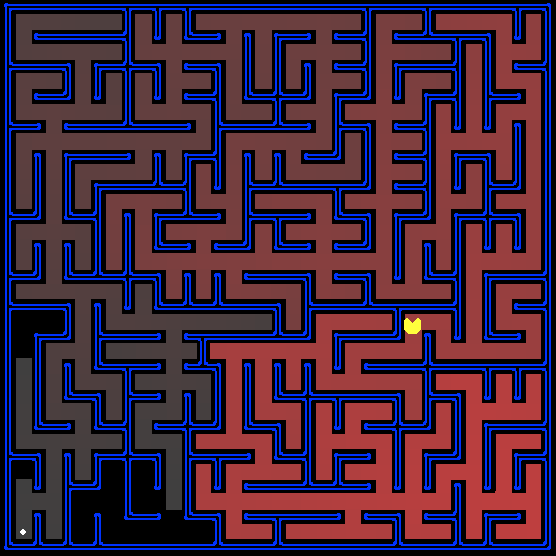

在这次实验中，你的吃豆人智能体将在迷宫世界中寻找路径，目的是到达某个特定地点或者高效收集食物。你将会构建一般的搜索算法并应用于吃豆人场景。
这个实验包含一个自动评分器来给你的答案评分，运用如下命令：

In [ ]:
%run autograder.py

这次实验包含多个Python文件，为了完成编程作业，你需要阅读和理解其中一部分文件，其他文件则可以忽略。你可以在课程网站上下载到实验代码的压缩包。

* 你需要编辑的文件:

  - `search.py`  你编写搜索算法的地方
  - `searchAgents.py` 你编写基于搜索的智能体的地方

* 你需要查看阅读的文件:

  - `pacman.py`运行吃豆人游戏的主要文件。这个文件描述了这次实验的吃豆人游戏的游戏状态类型GameState。
  - `game.py`吃豆人世界运行背后的逻辑。这个文件描述了几种支撑类型:AgentState, Agent, Direction, Grid
  - `util.py`对于实现搜索算法非常有用的数据结构

* 你可以忽略的支持文件：

  - `graphicsDisplay.py`吃豆人游戏图形显示
  - `graphicsUtils.py`吃豆人游戏图形显示支持文件
  - `textDisplay.py`吃豆人游戏的ASCII图形
  - `ghostAgents.py`控制幽灵的智能体
  - `keyboardAgents.py`控制吃豆人的键盘接口
  - `layout.py`用于读取和存储游戏布局的文件
  - `autograder.py`项目自动评分器
  - `testParser.py`解析自动评分器测试案例文件
  - `testClasses.py`通用自动评分测试类
  - `test_cases/`包含每个问题测试用例的文件夹
  - `searchTestClasses.py`项目1指定自动评分测试类

* 需要编辑和提交的文件：1.撰写好的实验报告。2.填写完成的压缩包`search.zip`里面的`search.py`, `searchAgents.py`文件。请不要修改压缩包里面的其他代码。

* 实验结果评分：运行`autograder.py`验证程序的正确性，自动获取分数。注意：不要修改提供的代码里面的函数名和类名。

* 贡献说明：实验内容来自加州大学伯克利分校的人工智能导论公开课。

# 二、	实验内容
## 欢迎来到吃豆人的世界

首先在课程网站上下载`search.zip`压缩包，解压，在命令行界面定位到解压出的文件夹，运用下面的命令玩一下吃豆人游戏：

In [ ]:
%run pacman.py

吃豆人生活在一个拥有扭曲的走廊和美味的圆形点心的光滑的蓝色世界。高效探索这个世界是吃豆人掌控自身领域的第一步。`searchAgents.py`文件中最简单的智能体是`GoWestAgent`，这个智能体总是像西行进（一个简单的条件反射智能体）。这个智能体偶尔能赢得游戏：

In [ ]:
%run pacman.py --layout testMaze --pacman GoWestAgent

但是需要转向的时候这个智能体的表现非常糟糕：

In [ ]:
import os
cmd = 'python pacman.py --layout tinyMaze --pacman GoWestAgent'
os.system(cmd)

如果吃豆人困住了，你在命令行终端可以键入`CTRL-c`退出游戏。

很快，你的智能体不仅能够求解小型迷宫`tinyMaze`，而且能够克服各式各样的迷宫。
注意`pacman.py`支持多个选项，每个选项可以用完整形式(例如：`--layout`)或者缩略形式（例如：`-l`）。你可以用下面的命令查看所有选项的列表和预设值。

In [ ]:
%run pacman.py -h

另外，这个项目里面出现的所有命令都存储在`commands.txt`文件中，方便拷贝粘贴使用。

### 问题1：使用深度优先搜索寻找一个固定食物点
在`searchAgents.py`文件中，你可以找到一个完整实现的`SearchAgent`，这个智能体规划出吃豆人世界中的一条路径，并一步步执行该路径。用于形成规划的搜索算法没有实现，这是你的任务。
首先，通过运行下面命令测试`SearchAgent`是否正常工作：

In [ ]:
%run pacman.py -l tinyMaze -p SearchAgent -a fn=tinyMazeSearch

上面的命令告诉`SearchAgent`使用`tinyMazeSearch`作为搜索算法，这个算法在`search.py`中实现。吃豆人可以成功探索这个迷宫。

是时候写一个成熟通用的搜索函数帮助吃豆人规划路径了。你可以在课程幻灯片上找到搜索算法的伪代码。记住，一个搜索节点不仅要包含搜索状态，同时要包含到达该节点的路径信息。
重要提示：你所有的搜索函数都要返回一个行动列表，这个行动列表引导智能体从起始点到达目标。这些行动必须是合法的移动（有效的方向，不能穿越墙移动）。

**重要提示**：确保使用在`util.py`文件中提供的`Stack`, `Queue`和`PriorityQueue`数据结构。这些数据结构的实现包含了与自动评分器autograder兼容的特殊属性。

**提示**：每个算法都非常相似。DFS，BFS，UCS，和A\*算法仅仅在如何管理前沿的节点上有所差异。因此，将关注力集中在正确实现DFS，随后其他算法的实现会非常直接简单。事实上，一种可行的实现方式是设计一种通用的搜索方法，可以配置具体算法的队列管理机制。（你不需要按照这种方式实现也可获得满分）。

在`search.py`文件中的`depthFirstSearch`函数里实现深度优先搜索算法（DFS）。为了完备性(complete)，实现图搜索版本的DFS，避免扩展已经访问过的状态。

你的代码应该能够快速找到以下几个迷宫的解决方案：

In [ ]:
%run pacman.py -l tinyMaze -p SearchAgent

In [ ]:
%run pacman.py -l mediumMaze -p SearchAgent

In [ ]:
%run pacman.py -l bigMaze -z .5 -p SearchAgent

在游戏盘面上会显示已探索状态的叠加以及它们的探索顺序（越明亮的红色代表越早探索）。观察一下探索顺序是你所期望的那样吗？吃豆人在到达目标的过程中确实经过了所有的探索方块了吗？

**提示**：如果你使用`Stack`作为你的数据结构，你的DFS算法找到的`mediumMaze`的方案长度应该为130(在你将`getSuccessors`函数得到的后继节点按顺序加入前沿的前提下)。这个是最短路径方案吗？如果不是，思考一下深度优先搜索错在哪里?

运行下面的命令查看你在**问题1的得分**：

In [ ]:
%run autograder.py -q q1

### 问题2：宽度优先搜索
在`search.py`文件中的`breadthFirstSearch`函数里实现宽度优先搜索算法(BFS)。同样的，实现图搜索版本的算法避免扩展已经访问过的状态。和深度优先搜索一样测试你的代码。

In [ ]:
%run pacman.py -l mediumMaze -p SearchAgent -a fn=bfs

In [ ]:
%run pacman.py -l bigMaze -p SearchAgent -a fn=bfs -z .5

BFS找到最小代价路径了吗？如果没有，检查一下你的实现。

**提示**：如果吃豆人移动的很慢，试一下选项：--frameTime 0

**注意**：如果你以通用的方式实现你的搜索代码，你的代码同样可以用来高效求解八数码问题。

In [ ]:
%run eightpuzzle.py

运行下面的命令查看你在**问题2的得分**：

In [ ]:
%run autograder.py -q q2

### 问题3：一致代价搜索
BFS寻找最少行动到达目标的路径。我们希望寻找其他层面的“最优”路径。考虑`mediumDottedMaze`和`mediumScaryMaze`。

通过改变代价函数，我们可以鼓励吃豆人去寻找不同的路径。例如，我们为充斥着幽灵的区域危险步骤收取较多代价，为充斥着食物的区域的步骤收取较少的代价，一个理性的吃豆人会回应这些调整自身行为。

在`search.py`文件中的`uniformCostSearch`搜索函数里实现一致代价图搜索算法。我们鼓励你浏览一下util.py文件里面的数据结构，这些数据结构对你的实现非常有帮助。实现好之后，你应该可以观察到在以下的布局中吃豆人的出色表现。下面的智能体都是UCS智能体，仅仅在代价函数上有所区别（智能体和代价函数已经为你写好了）。

In [ ]:
%run pacman.py -l mediumMaze -p SearchAgent -a fn=ucs

In [ ]:
%run pacman.py -l mediumDottedMaze -p StayEastSearchAgent

In [ ]:
%run pacman.py -l mediumScaryMaze -p StayWestSearchAgent

**注意**：对于`StayEastSearchAgent`，你应该得到非常低代价的路径；对于`StayWestSearchAgent`，你应该得到非常高代价的路径，这起因于他们的指数代价函数（查看`searchAgents.py`文件）。

运行下面的命令查看你在**问题3的得分**：

In [ ]:
%run autograder.py -q q3

### 问题4：A\*搜索
实现`search.py`文件中`aStarSearch`函数里的A\*图搜索算法。A\*以一个启发式函数作为参数。启发式函数有两个参数：一个搜索问题的状态（主要参数），问题自身（为了获取参考信息）。`search.py`文件中的`nullHeuristic`启发式函数是一个简单的例子。
你可以在迷宫中寻找到固定位置的路径的原始问题上，使用曼哈顿距离启发式测试你的A\*实现（曼哈顿距离启发式`manhattanHeuristic`已经在文件`searchAgents.py`中实现）。

In [ ]:
%run pacman.py -l bigMaze -z .5 -p SearchAgent -a fn=astar,heuristic=manhattanHeuristic

你可以看到A\*算法查找最优路径的速度略快于一致代价搜索（我们的实现中，549 vs. 620扩展节点，在优先级中打破平局的方法可能令你的数据与我们稍有不同）。当使用不同搜索策略求解`openMaze`的时候会发生什么？

运行下面的命令查看你在**问题4的得分**：

In [ ]:
%run autograder.py -q q4

### 问题5：搜索所有角落
在更具挑战性的问题中A\*算法的优势是显著的。现在是时候描述一个新的问题并为其设计启发式了。

在角落迷宫中，有四个食物点，坐落在每一个角落里。我们的搜索问题是在迷宫中找到触及四个角落的最短路径（不管角落里是否有食物存在）。注意在某些迷宫中（例如`tinyCorners`），最短路径不是总是先朝向最近的食物。提示：`tinyCorners`的最短路径花费28步。

**注意**：在完成问题5之前请先完成问题2，因为问题5的构建于你问题2的答案上。

在`searchAgents.py`文件中实现`CornersProblem`搜索问题。你将需要选择一种编码了是否到达过四个角落的状态表示方法。完成之后，你的搜索智能体将能够求解：

In [ ]:
%run pacman.py -l tinyCorners -p SearchAgent -a fn=bfs,prob=CornersProblem

In [ ]:
%run pacman.py -l mediumCorners -p SearchAgent -a fn=bfs,prob=CornersProblem

为了获得满分，你需要定义一种抽象状态表示方法，这个方法不涉及无关的信息（例如幽灵的位置，剩余食物的位置等等）。特别需要注意的是，不要使用吃豆人游戏的游戏状态 `GameState`作为搜索状态，否则你的代码会跑得非常非常慢（也有可能出错）。

**提示**：在你实现中需要引用的游戏状态部分信息只有吃豆人的起始位置以及四个角落的位置。
我们的宽度优先搜索`breadthFirstSearch`在`mediumCorners`问题上扩展了2000个以下搜索节点。使用启发式（A\*搜索）可以减少搜索量。

运行下面的命令查看你在**问题5的得分**：

In [ ]:
%run autograder.py -q q5

### 问题6：角落问题：启发式
**注意**：在完成问题6之前确保你完成了问题4，因为问题6构建于你问题4的答案。
在`cornersHeuristic`中为角落搜索问题`CornersProblem`实现一个非平凡的一致的启发式。

In [ ]:
%run pacman.py -l mediumCorners -p AStarCornersAgent -z 0.5

**注意**：AStarCornersAgent是下面语句的简写

`-p SearchAgent -a fn=aStarSearch,prob=CornersProblem,heuristic=cornersHeuristic`

可采纳性vs一致性：记住，启发式是以搜索状态为输入，返回一个到最近目标的估计开销的函数。越有效的启发式将返回越接近真实开销的数值。为了达到可采纳性，启发式值必须是实际到达最近目标的最短路径开销的下界（并且是非负的）。为了达到一致性，需要额外满足条件：如果一个行动的开销是c，那么采取这项行动之后最多能够使得启发式下降c。

记住可采纳性不能够保证图搜索的正确性，你需要更强的一致性条件。然而，可采纳启发式一般而言是一致的，特别当它们是从问题松弛派生出来的。因此，运用头脑风暴从一个可采纳的启发式入手是最简单的。一旦你有了效果不错的可采纳启发式，你可以检查一下它是不是一致的。保证一致性的唯一办法是经过数学证明。然而，不一致性可以通过验证每一个扩展的节点，它的后继有相等或者更高的f值检测出来。另外，如果UCS和A\*返回不同长度的路径，那么你的启发式是不一致的。这些东西很有技巧性！

非平凡启发式：平凡启发式包括总是返回0的启发式（UCS）以及计算真实代价的启发式。前者不会节省你任何时间，后者会让自动评分器超时。你希望的是一个可以减少总的计算时间的启发式，即使这个编程作业只是单单检查扩展节点的数目（附加一个合理的时间限制）。

评分：你的启发式必须是非平凡的非负启发式才能获得分数。确保你的启发式在任一个目标状态返回0，并且永远不返回负数。取决于你的启发式扩展了多少个节点：

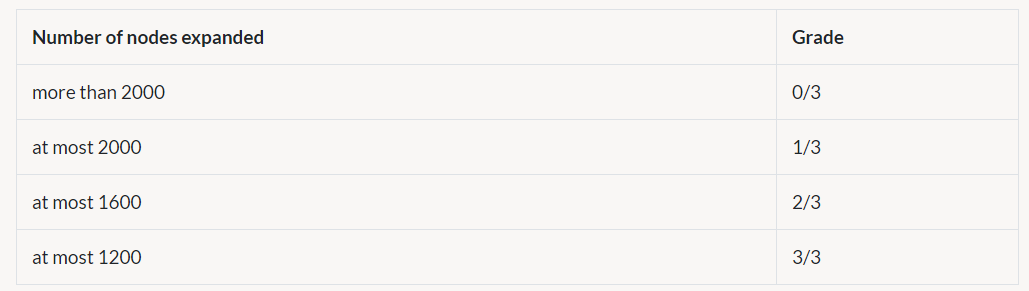

记住：如果你的启发式不是一致的，你将得不到任何分数。

运行下面的命令查看你在**问题6的得分**：

In [ ]:
%run autograder.py -q q6

### 问题7：吃尽所有的点
现在我们解决一个困难的搜索问题：用最少的步数吃尽所有的食物点。为此，我们需要一个新的搜索问题定义形式化清除食物问题，已经在`searchAgents.py`的`FoodSearchProblem`为你实现好了。一个解决方案定义为在吃豆人世界中收集所有的食物的路径。对于当前的实验，我们的方案不考虑幽灵以及力量丸，只考虑常规食物、墙、以及吃豆人。（当然，幽灵可以破坏方案的执行，我们将在下次实验涉及）。如果你正确实现了通用搜索方法，带有`null`启发式的A\*算法（等同于一致代价搜索）应该能很快找到testSearch的最优解，不用修改代码(总的开销是7)。

In [ ]:
%run pacman.py -l testSearch -p AStarFoodSearchAgent

**注意**：AStarFoodSearchAgent是以下选项的缩写

`-p SearchAgent -a fn=astar,prob=FoodSearchProblem,heuristic=foodHeuristic`

你应该会发现UCS开始变慢了，甚至是对于看起来简单的tinySearch。作为参考，我们的实现花费了2.5秒时间找到一条长度27的路径，其中扩展了5057个搜索节点。

**注意**：在完成问题7之前确保完成了问题4，问题7基于问题4的答案。

填写`searchAgents.py`文件中的`foodHeuristic`，为`FoodSearchProblem`实现一个一致性的启发式。在`trickySearch`布局上测试你的智能体：

In [ ]:
%run pacman.py -l trickySearch -p AStarFoodSearchAgent

我们的UCS智能体用大约13秒找到了最优路径，探索了16,000个节点。

任何非平凡非负的启发式将获得1分。确保你的启发式在任意目标状态返回0,并永远不会返回负数。取决于你的启发式扩展了多少节点，你将获得额外的分数。

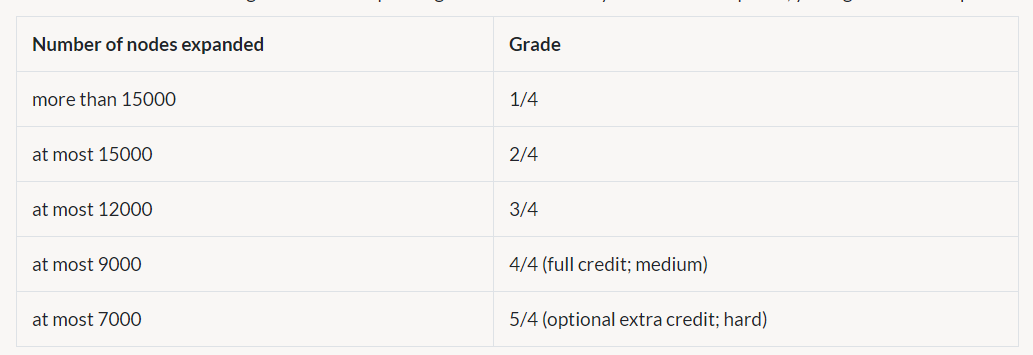

**记住**：如果你的启发式不是一致的，你将得不到任何分数。

你能够在很短的时间内求解`mediumSearch`吗？

运行下面的命令查看你在**问题7的得分**：

In [ ]:
%run autograder.py -q q7

### 问题8：次优搜索
有时候，即使使用带有良好启发式的A\*算法，寻找遍历所有食物的最优路径依然困难。在这些情况下，我们想要快速找到一些相对较好的路径。在这一部分，你将编写一个总是贪心地吃离他最近的食物的智能体。在`searchAgents.py`文件中已经为你实现好了`ClosestDotSearchAgent`，但是遗漏了查找最近食物点路径的关键函数。

实现`searchAgents.py`文件中的`findPathToClosestDot`函数。我们的智能体在1秒内求解了这个迷宫，找到开销为350的路径：

In [ ]:
%run pacman.py -l bigSearch -p ClosestDotSearchAgent -z .5

**提示**：最快完成`findPathToClosestDot`的方法是填好`AnyFoodSearchProblem`，这个问题缺失了目标检测这一部分。接下来，用适当的搜索算法求解这个问题。答案是非常简短的。

你的`ClosestDotSearchAgent`智能体不是总能在迷宫中找到最短路径。确保你了解为什么，并且尝试找到一个小的例子说明迭代地到达最近的食物点不能得到一个吃掉所有食物点的最短路径。

运行下面的命令查看你在**问题8的得分**：

In [ ]:
%run autograder.py -q q8